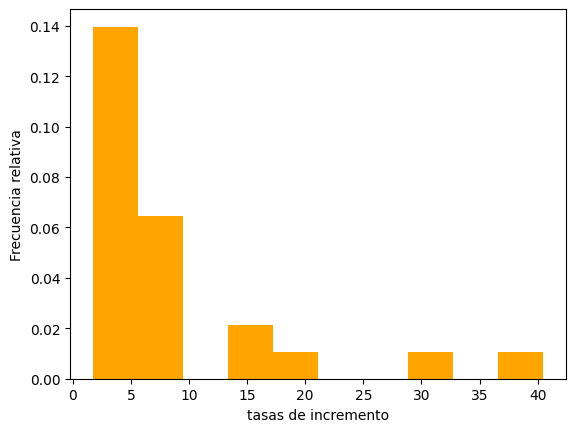

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Ejemplo 2: tasas de incrementos de precios

tasas = [2.2, 7.6, 2.9, 4.6, 4.1, 3.9, 7.4, 3.2, 5.1, 5.3, 20.1, 2.3, 5.5,
         32.7, 9.1, 1.7, 3.2, 5.8, 16.3, 15.9, 5.9, 6.7, 3.4, 40.5]

# Veamos el perfil de los "datos originales"
plt.hist(tasas, color="orange", density=True)
# en el eje vertical pone frecuencias relativas
plt.xlabel("tasas de incremento")
plt.ylabel("Frecuencia relativa")
plt.show()

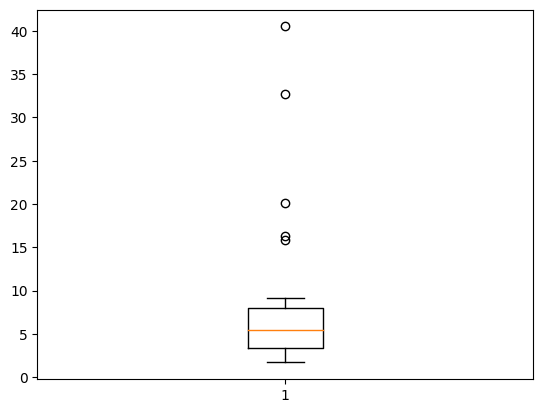

In [3]:
# Es claro que los datos NO siguen una distribucion normal.

plt.boxplot(tasas)
plt.show()

In [4]:
# El diagrama de caja-brazos parece mostrar simetria pero tiene varios
# atipicos.

# ¿Prueba de hipotesis para normalidad?

from scipy.stats import shapiro
print(shapiro(tasas))

ShapiroResult(statistic=0.680259108543396, pvalue=5.583931852015667e-06)


In [5]:
# El pvalue es casi cero, por lo que se rechaza H0 y la distribucion
# de las tasas de incremento de precios NO se distribuye normal.
# Asi que a transformarla!

# Aplicamos la transformacion de Box-Cox

tasas_transf, lambda_optimo2 = stats.boxcox(tasas)
print(tasas_transf[1:15])  # vemos los primeros 15 datos transformados

[1.38032253 0.8638745  1.13645674 1.0731862  1.04474994 1.36858562
 0.92641111 1.1907245  1.21037852 1.73182378 0.70632291 1.22901559
 1.86184803 1.45634451]


In [6]:
# El valor de lambda optimo:

print(f"Valor de lambda optimo para usarse en la transformacion: {lambda_optimo2}")

Valor de lambda optimo para usarse en la transformacion: -0.4073528258240791


In [7]:
# Aplicamos la formula de Box-Cox de las notas:

tasas2 = ((tasas**lambda_optimo2)-1)/lambda_optimo2
print(tasas2)

[0.67437253 1.38032253 0.8638745  1.13645674 1.0731862  1.04474994
 1.36858562 0.92641111 1.1907245  1.21037852 1.73182378 0.70632291
 1.22901559 1.86184803 1.45634451 0.47719787 0.92641111 1.25525153
 1.66739128 1.65938063 1.26357604 1.3237109  0.96369517 1.91133883]


In [8]:
# Aplicamos la recomendacion de la tabla de las notas cuando
# lambda=-0.5
tasas3 = 1/np.sqrt(tasas)
print(tasas3)

[0.67419986 0.36273813 0.58722022 0.4662524  0.4938648  0.50636968
 0.36760731 0.55901699 0.44280744 0.43437224 0.22304987 0.65938047
 0.42640143 0.17487435 0.33149677 0.76696499 0.55901699 0.4152274
 0.2476887  0.25078493 0.41169348 0.3863337  0.54232614 0.15713484]


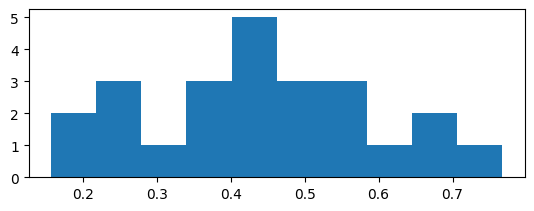

In [9]:
# Verificamos normalidad

plt.subplot(1, 2, 1) # renglon 1, columna 2, indice 1
plt.hist(tasas)
plt.subplot(1, 2, 2) # indice 2
plt.hist(tasas2)
plt.subplot(2, 1, 1) # indice 3
plt.hist(tasas3)
plt.show()